In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
from scipy import optimize
from folium.plugins import MarkerCluster,HeatMap

In [2]:
# Reading the pre processed dataset
hcho_data = pd.read_csv('preprocessed_dataset/hcho_data.csv')
hcho_data

,HCHO Reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000263,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000263,Colombo Proper,2019-01-02,2019-01-03
4,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03
...,...,...,...,...
12777,0.000117,Jaffna Proper,2023-12-30,2023-12-31
12778,0.000117,"Bibile, Monaragala",2023-12-31,2024-01-01
12779,0.000065,Kurunegala Proper,2023-12-31,2024-01-01
12780,0.000065,Jaffna Proper,2023-12-31,2024-01-01


In [3]:
# import folium
# from geopy.geocoders import Nominatim

# # Initialize a geocoder
# geolocator = Nominatim(user_agent="hcho_map")

# # Function to get latitude and longitude for a location
# def get_coordinates(location):
#     try:
#         location = geolocator.geocode(location)
#         return location.latitude, location.longitude
#     except:
#         return None, None

# # Apply the function to get coordinates for each location in the dataset
# hcho_data['latitude'], hcho_data['longitude'] = zip(*hcho_data['Location'].apply(get_coordinates))

# # Drop rows where coordinates couldn't be obtained
# hcho_data = hcho_data.dropna()

# # Create a map centered at the mean latitude and longitude
# map_hcho = folium.Map(location=[hcho_data['latitude'].mean(), hcho_data['longitude'].mean()], zoom_start=6)

# # Create a MarkerCluster layer
# marker_cluster = MarkerCluster().add_to(map_hcho)

# # Iterate over the rows of the DataFrame and add markers to the MarkerCluster layer
# for index, row in hcho_data.iterrows():
#     folium.Marker(location=[row['latitude'], row['longitude']], popup=f"HCHO Reading: {row['HCHO Reading']}").add_to(marker_cluster)

# # Display the map
# map_hcho

In [23]:
hcho_data['Current Date'] = pd.to_datetime(hcho_data['Current Date'])
hcho_data['Next Date'] = pd.to_datetime(hcho_data['Next Date'])

In [27]:
# Extracting the year and month
hcho_data['Year'] = hcho_data['Current Date'].dt.year
hcho_data['Month'] = hcho_data['Current Date'].dt.month

In [28]:
# Grouping the data by year and month
seasoned_data = hcho_data.groupby(['Year', 'Month'])['HCHO Reading'].mean().reset_index()

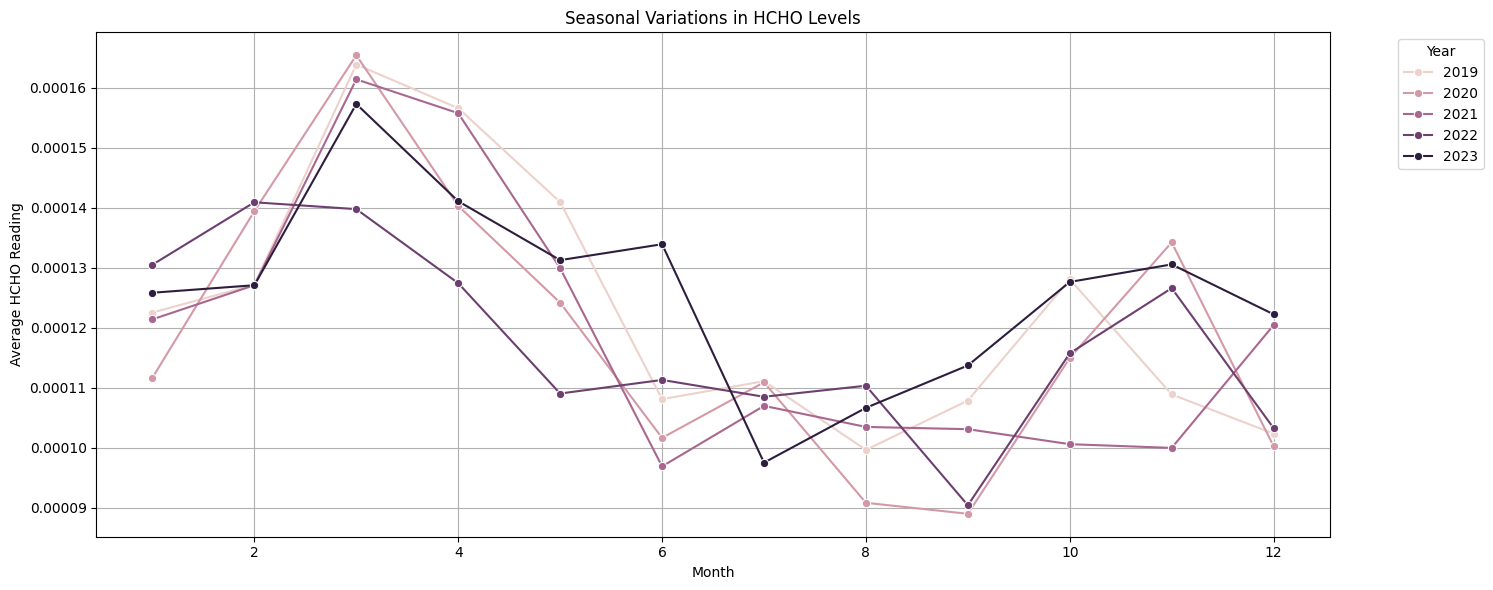

In [29]:
# Plotting seasonal variations
plt.figure(figsize=(15, 6))
sns.lineplot(x="Month", y="HCHO Reading", hue="Year", data=seasoned_data, marker='o')
plt.title('Seasonal Variations in HCHO Levels')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

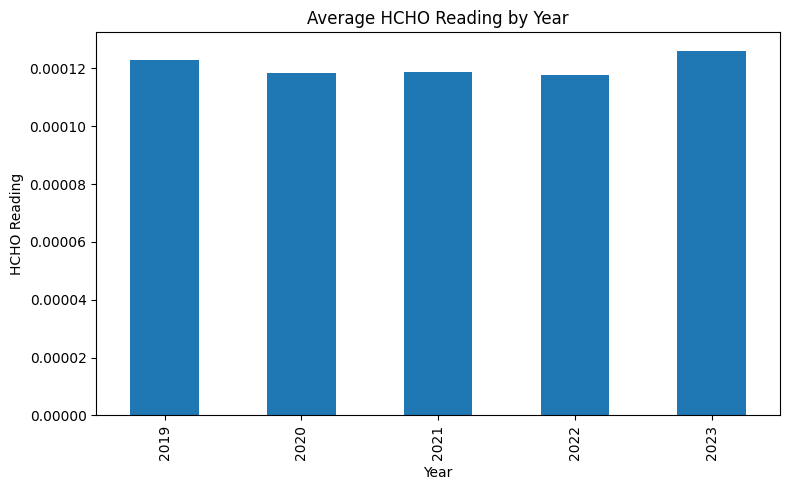

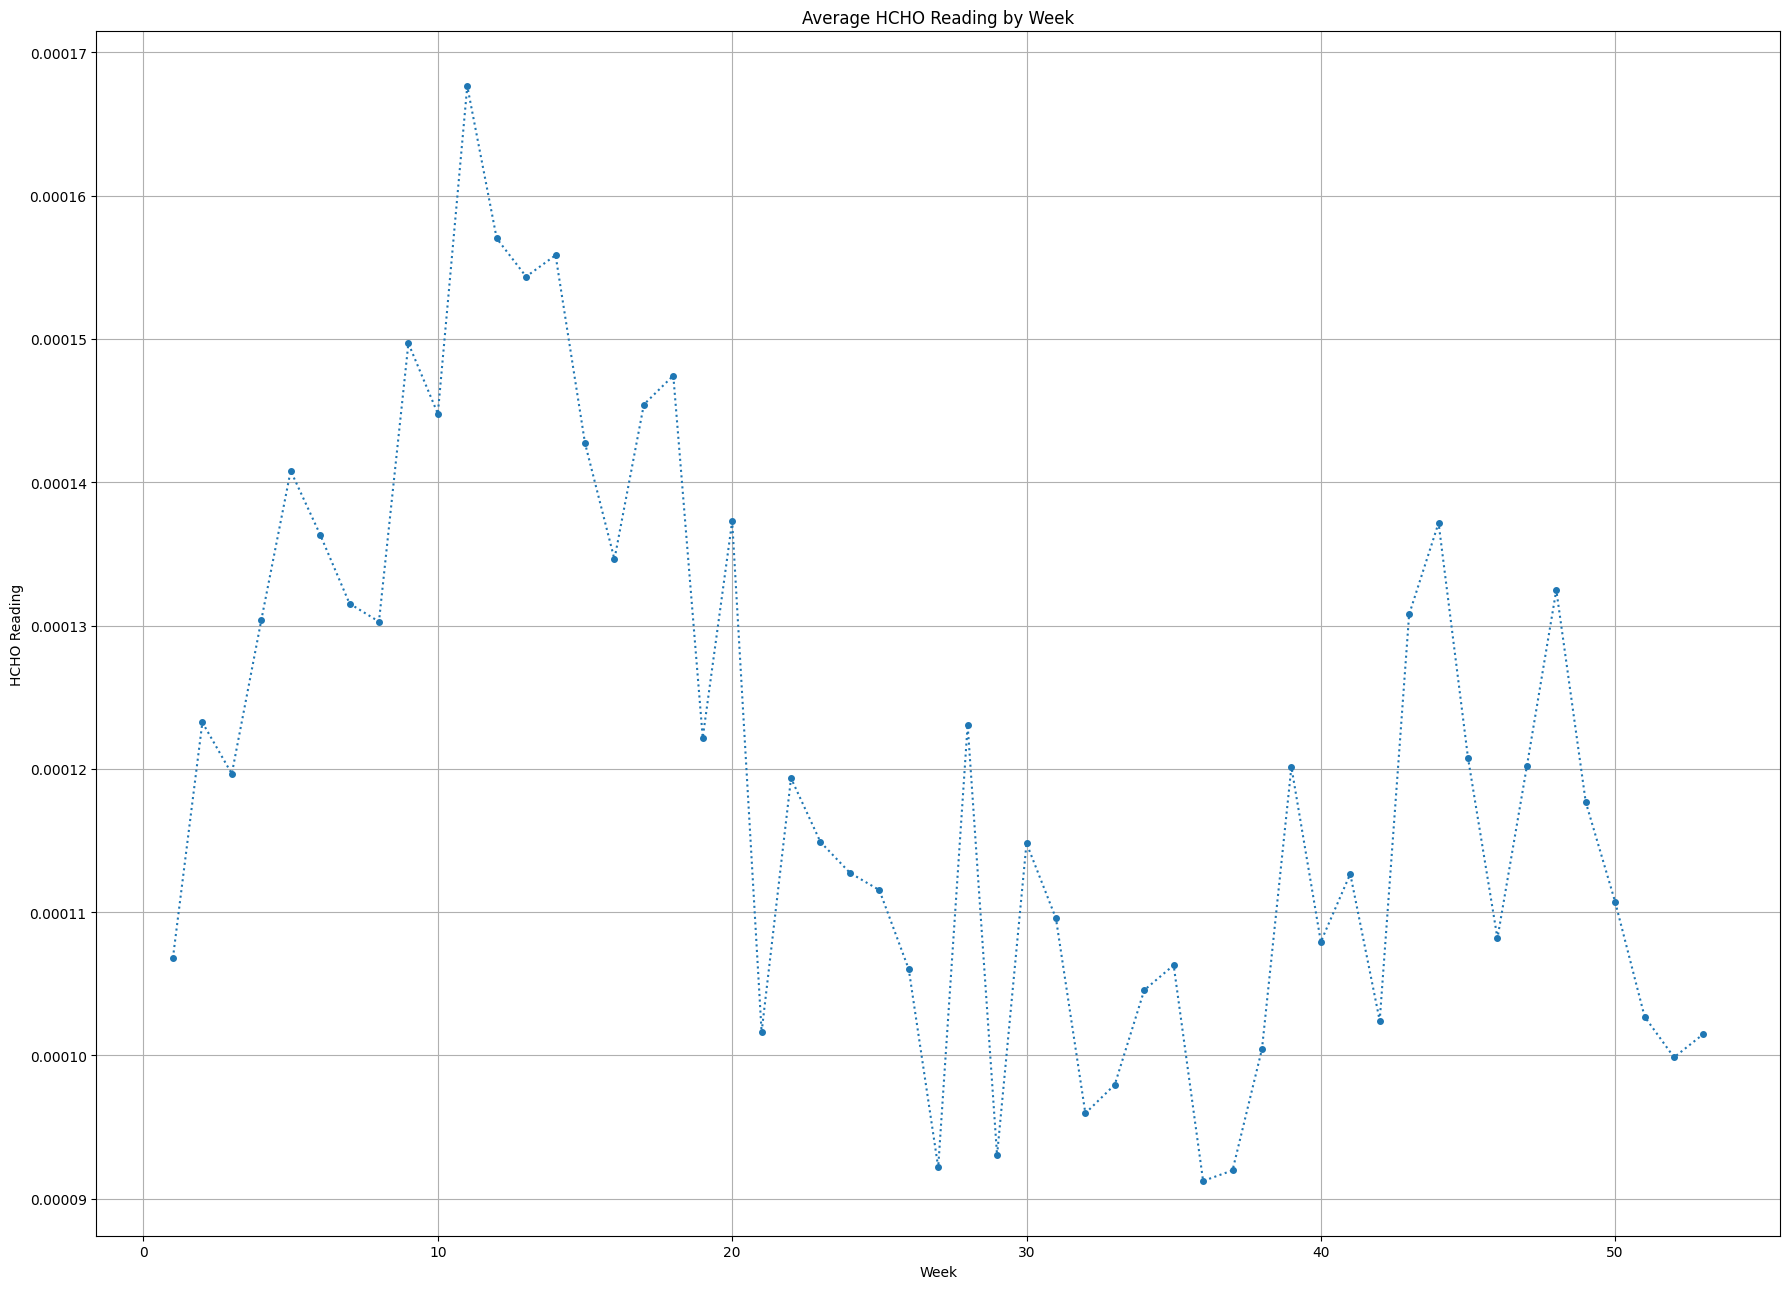

In [16]:
# Plot average HCHO reading by year
plt.figure(figsize=(8, 5))
hcho_data.groupby('Year')['HCHO Reading'].mean().plot(kind='bar')
plt.title('Average HCHO Reading by Year')
plt.xlabel('Year')
plt.ylabel('HCHO Reading')
plt.tight_layout()
plt.show()

# Plot average HCHO reading by week
plt.figure(figsize=(18, 13))
hcho_data.groupby('Week')['HCHO Reading'].mean().plot(style='.:', markersize=8)
plt.title('Average HCHO Reading by Week')
plt.xlabel('Week')
plt.ylabel('HCHO Reading')
plt.grid(True)
plt.tight_layout()
plt.show()

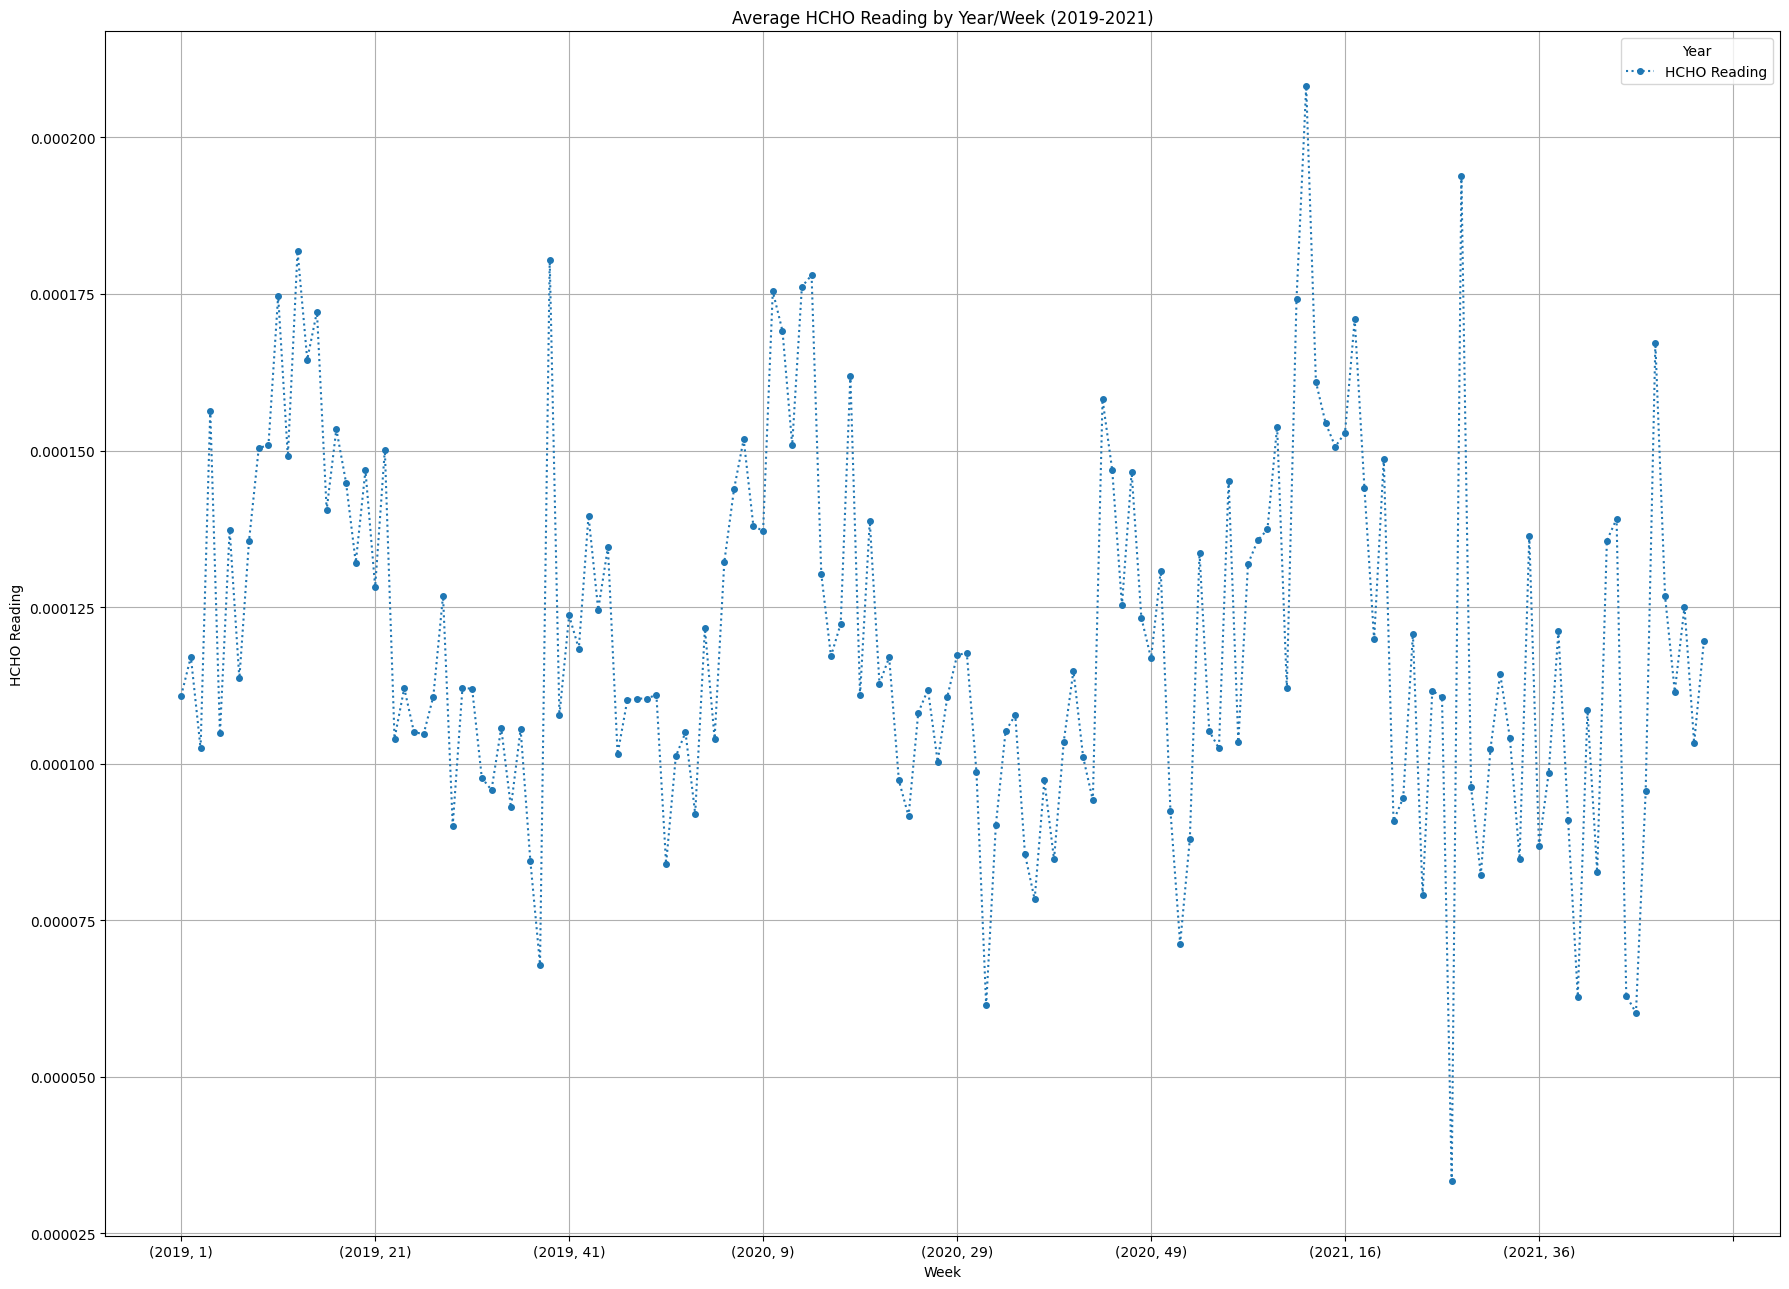

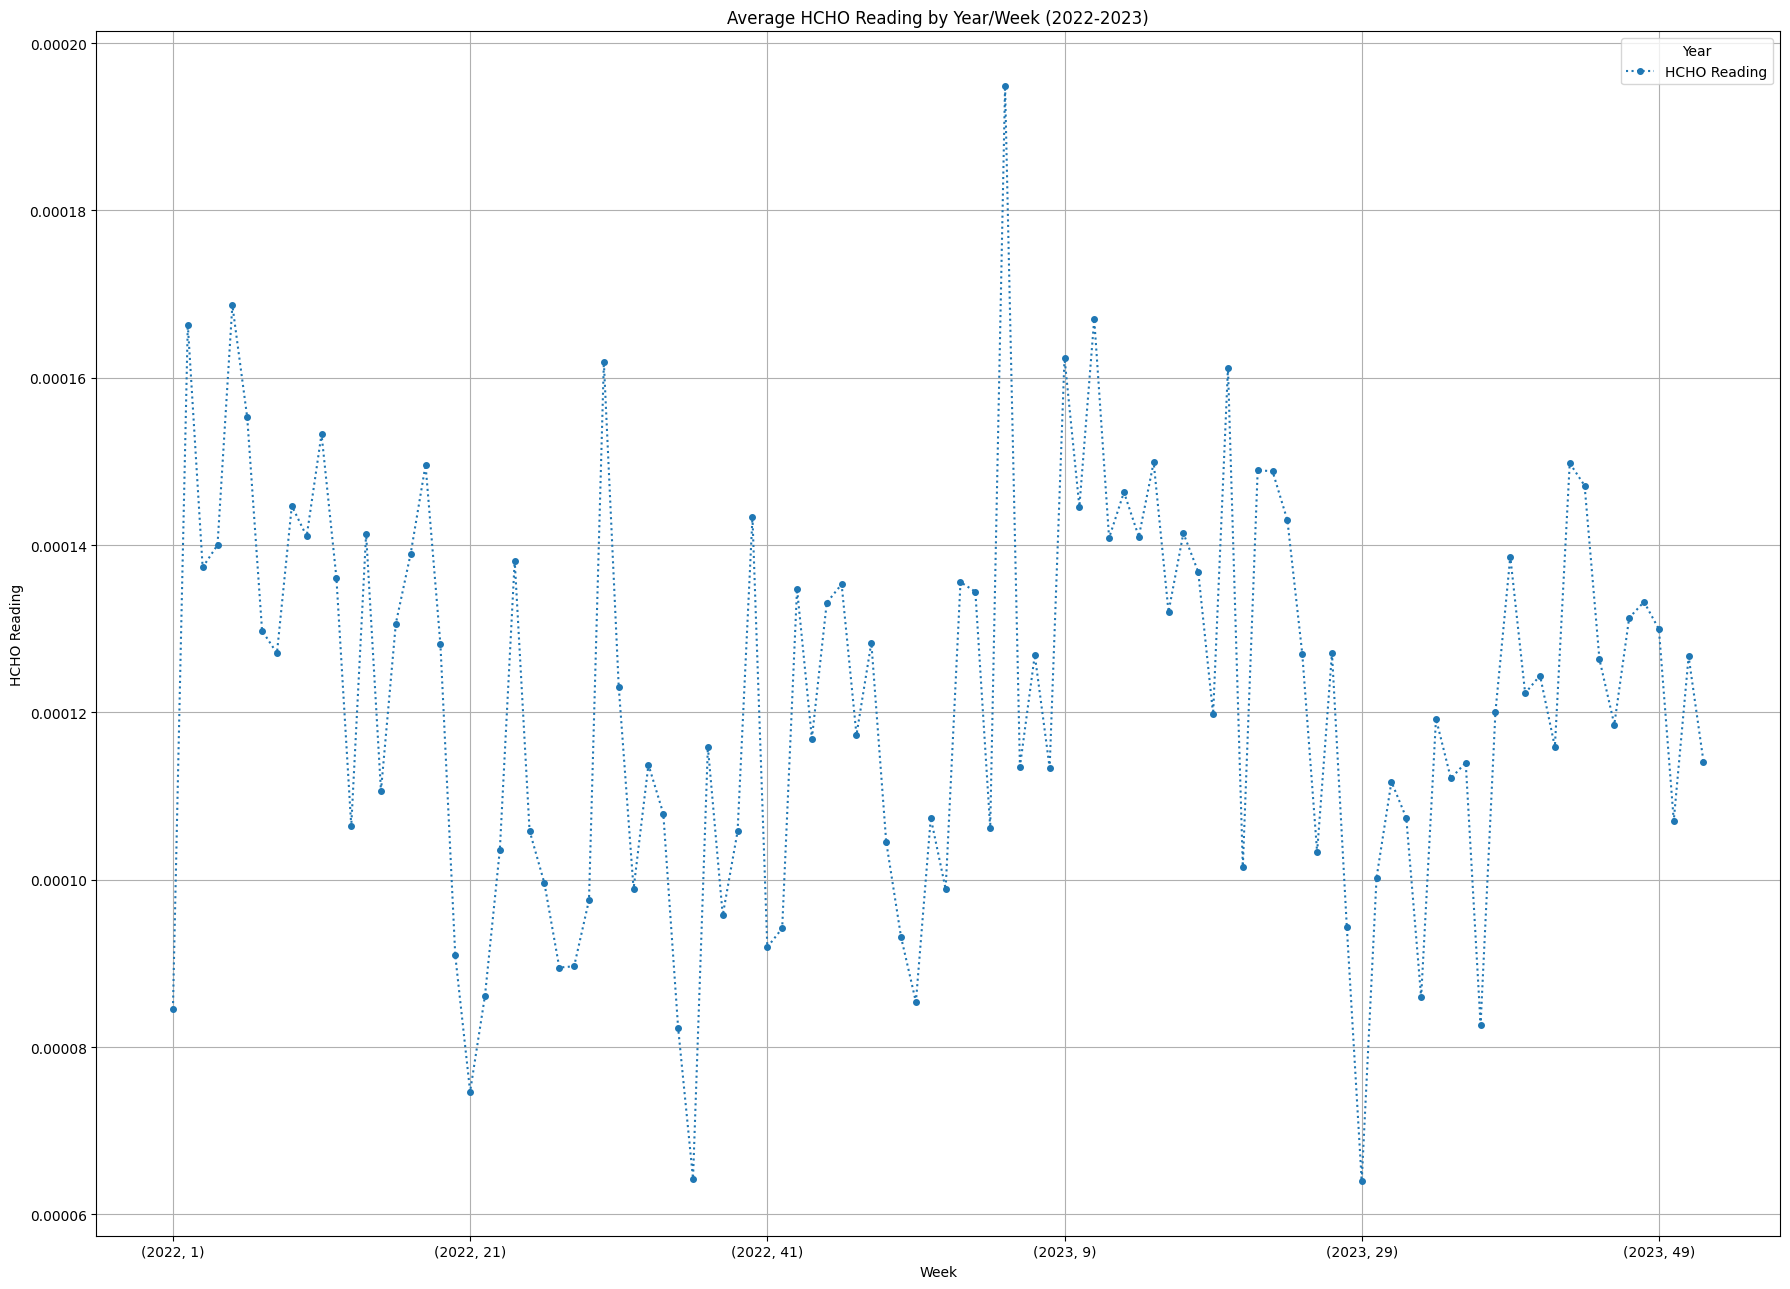

In [43]:
# Convert 'Current Date' to datetime format
hcho_data['Current Date'] = pd.to_datetime(hcho_data['Current Date'])

# Extract year from 'Current Date'
hcho_data['Year'] = hcho_data['Current Date'].dt.year

# Filter data for 2019-2021 and 2022-2023
hcho_data_2019_2021 = hcho_data[(hcho_data['Year'] >= 2019) & (hcho_data['Year'] <= 2021)]
hcho_data_2022_2023 = hcho_data[(hcho_data['Year'] >= 2022) & (hcho_data['Year'] <= 2023)]

# Plot average HCHO reading by year/week for 2019-2021
plt.figure(figsize=(18, 13))  # Adjust the size of the figure here
hcho_data_2019_2021.groupby(['Year', 'Week'])['HCHO Reading'].mean().plot(style='.:', markersize=8)
plt.title('Average HCHO Reading by Year/Week (2019-2021)')
plt.ylabel('HCHO Reading')
plt.xlabel('Week')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot average HCHO reading by year/week for 2022-2023
plt.figure(figsize=(18, 13))  # Adjust the size of the figure here
hcho_data_2022_2023.groupby(['Year', 'Week'])['HCHO Reading'].mean().plot(style='.:', markersize=8)
plt.title('Average HCHO Reading by Year/Week (2022-2023)')
plt.ylabel('HCHO Reading')
plt.xlabel('Week')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

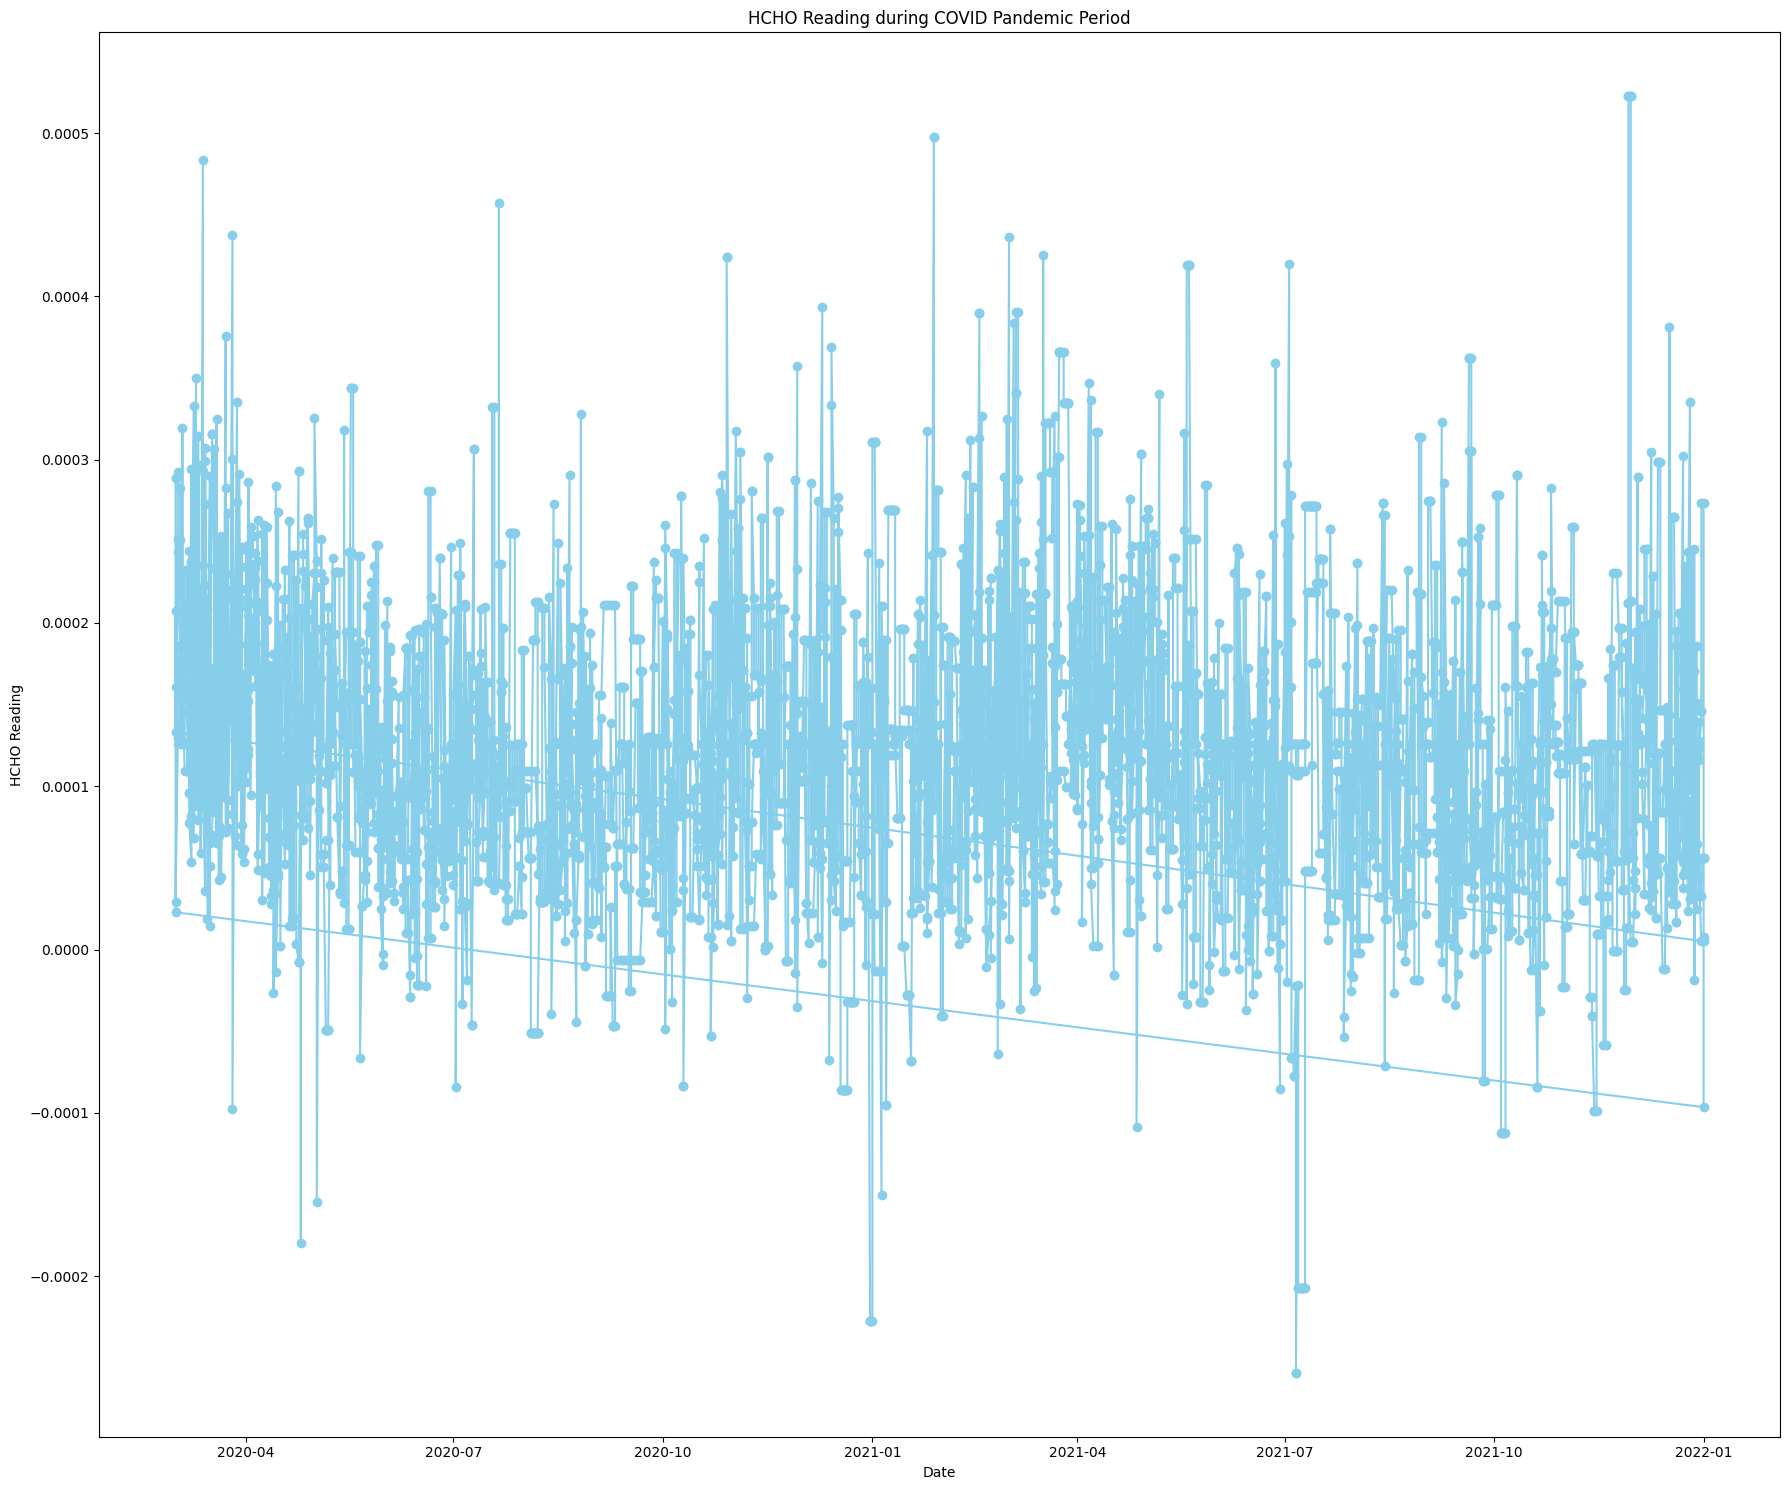

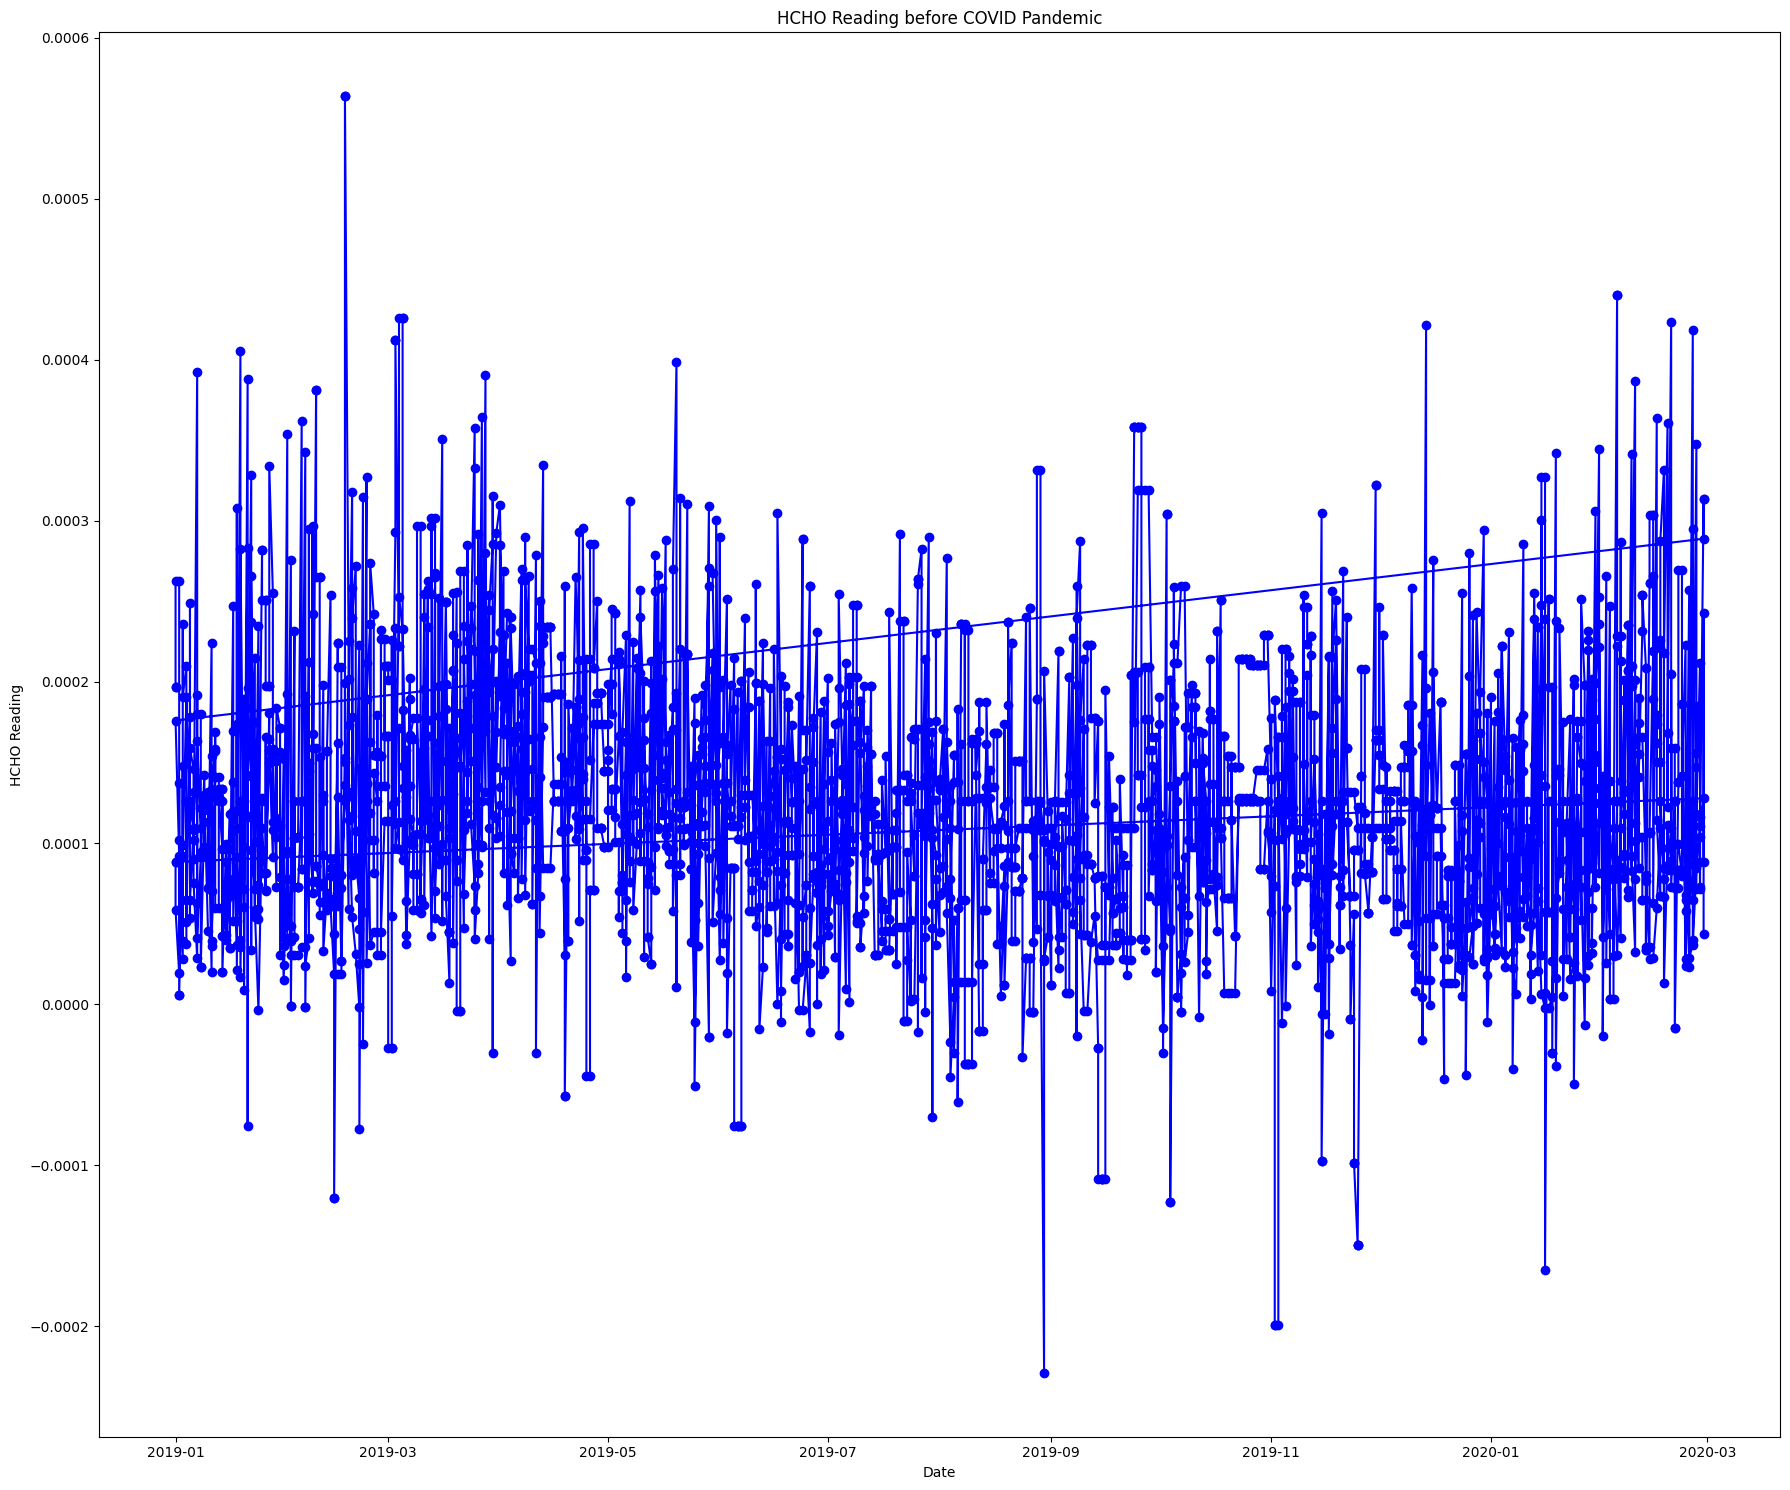

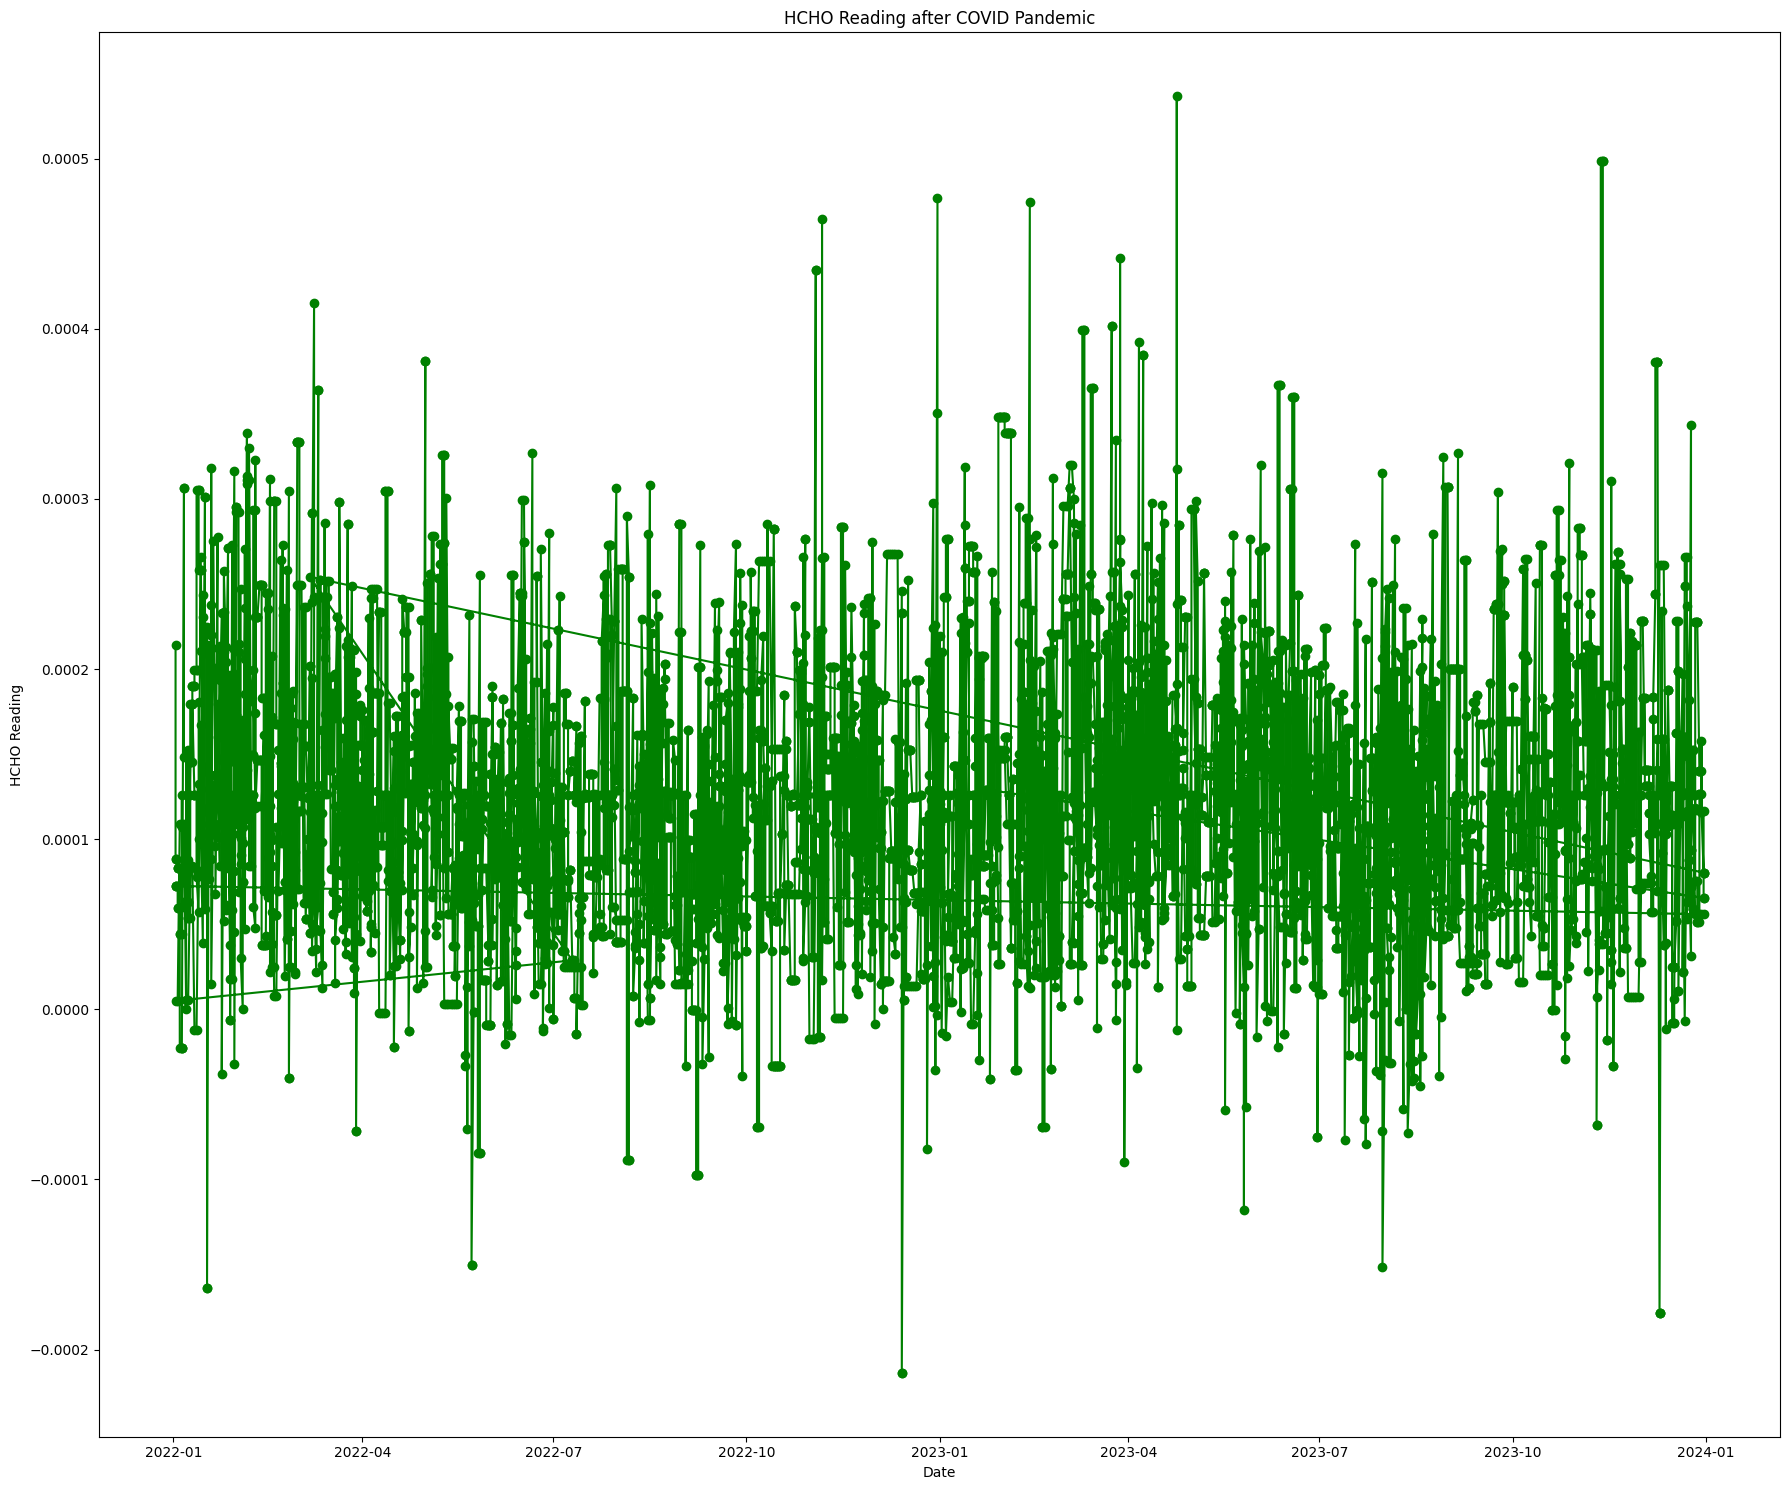

In [53]:
covid_start_date = '2020-03-01' 
covid_end_date = '2022-01-01' 
pre_pandemic_end_date = '2020-02-29'
post_pandemic_start_date = '2022-01-02'

# Filter data for COVID pandemic period, before, and after pandemic period
covid_period = hcho_data[(hcho_data['Current Date'] >= covid_start_date) & (hcho_data['Current Date'] <= covid_end_date)]
pre_pandemic_period = hcho_data[hcho_data['Current Date'] <= pre_pandemic_end_date]
post_pandemic_period = hcho_data[hcho_data['Current Date'] >= post_pandemic_start_date]

# Plot HCHO reading for COVID pandemic period
plt.figure(figsize=(18, 15))
plt.plot(covid_period['Current Date'], covid_period['HCHO Reading'], color='skyblue', marker ='o')
plt.title('HCHO Reading during COVID Pandemic Period')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(False)  # This line removes gridlines from the graph
plt.tight_layout()
plt.show()

# Plot HCHO reading for before pandemic period
plt.figure(figsize=(18, 15))
plt.plot(pre_pandemic_period['Current Date'], pre_pandemic_period['HCHO Reading'], color='blue', marker ='o')
plt.title('HCHO Reading before COVID Pandemic')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(False)  # This line removes gridlines from the graph
plt.tight_layout()
plt.show()

# Plot HCHO reading for after pandemic period
plt.figure(figsize=(18, 15))
plt.plot(post_pandemic_period['Current Date'], post_pandemic_period['HCHO Reading'], color='green', marker ='o')
plt.title('HCHO Reading after COVID Pandemic')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(False)  # This line removes gridlines from the graph
plt.tight_layout()
plt.show()

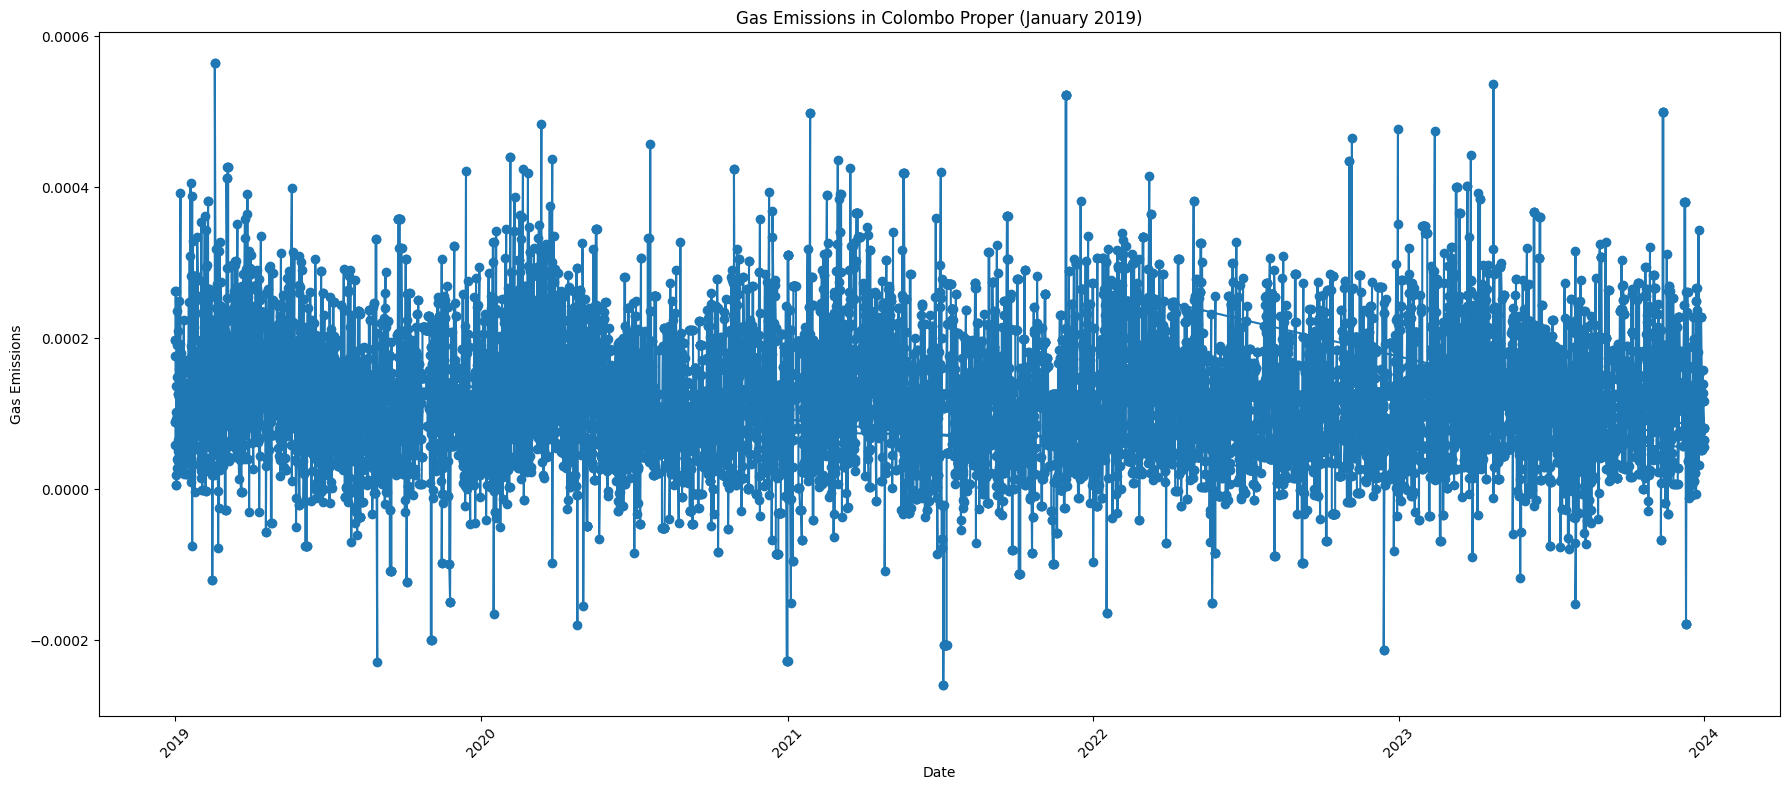

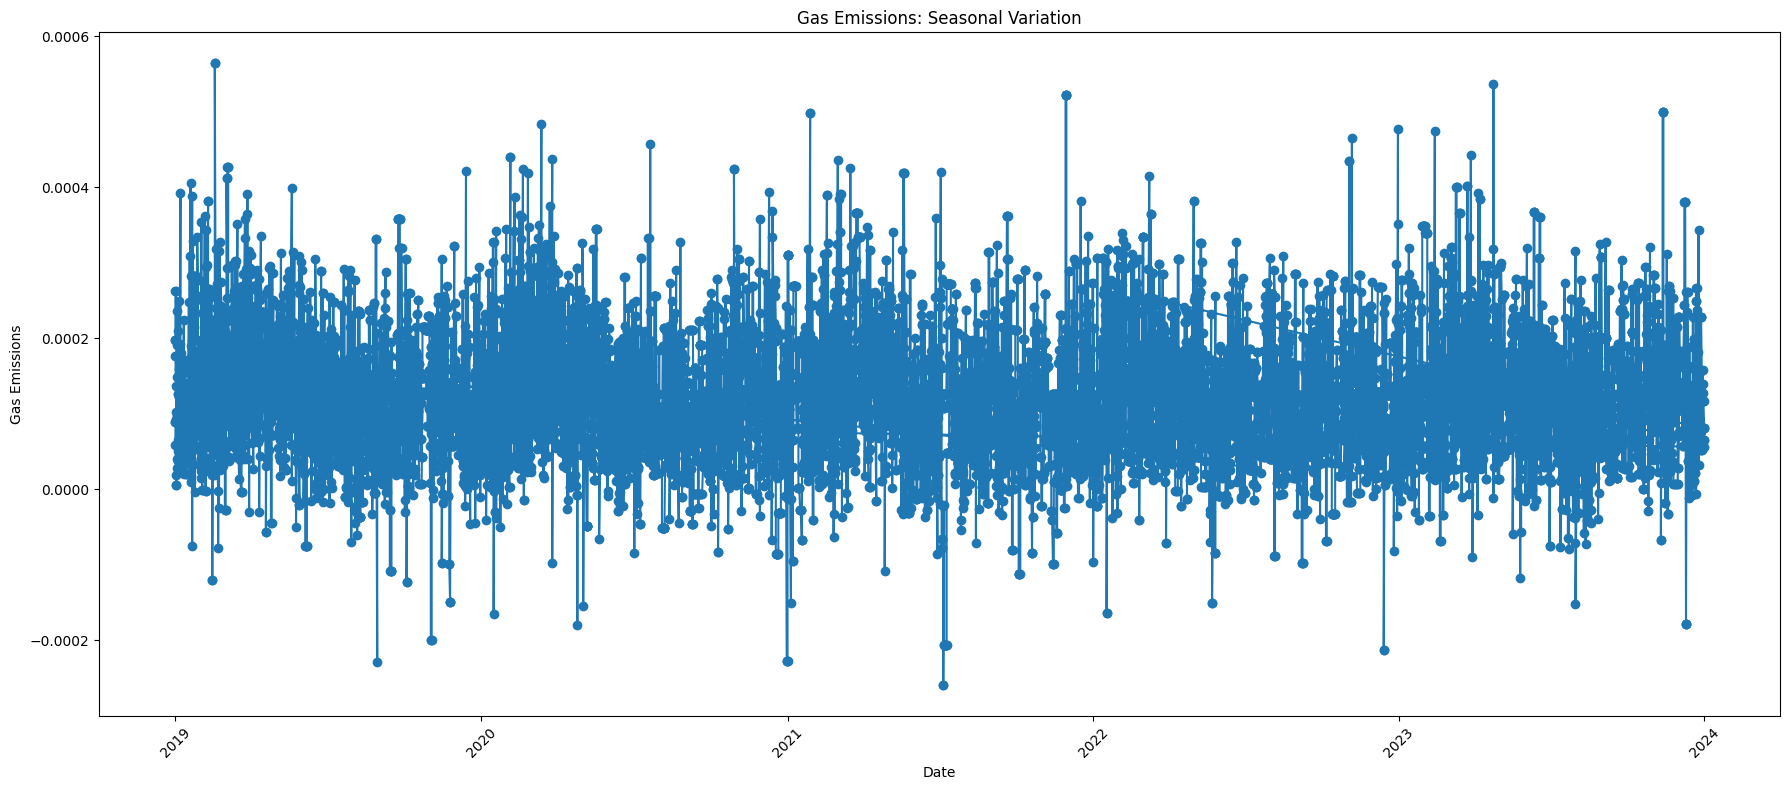

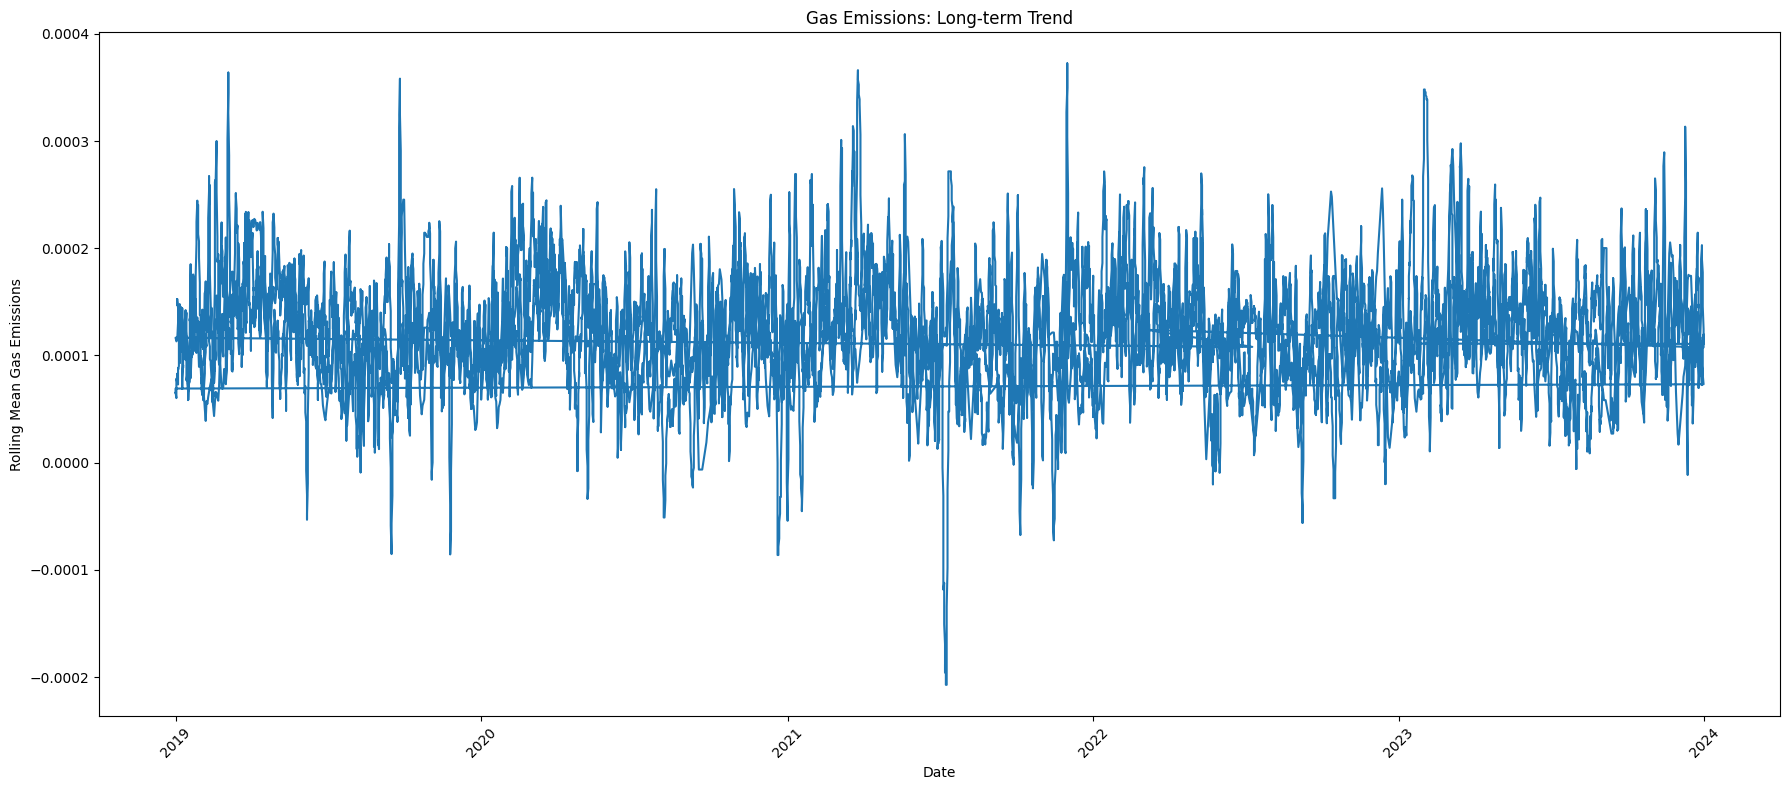

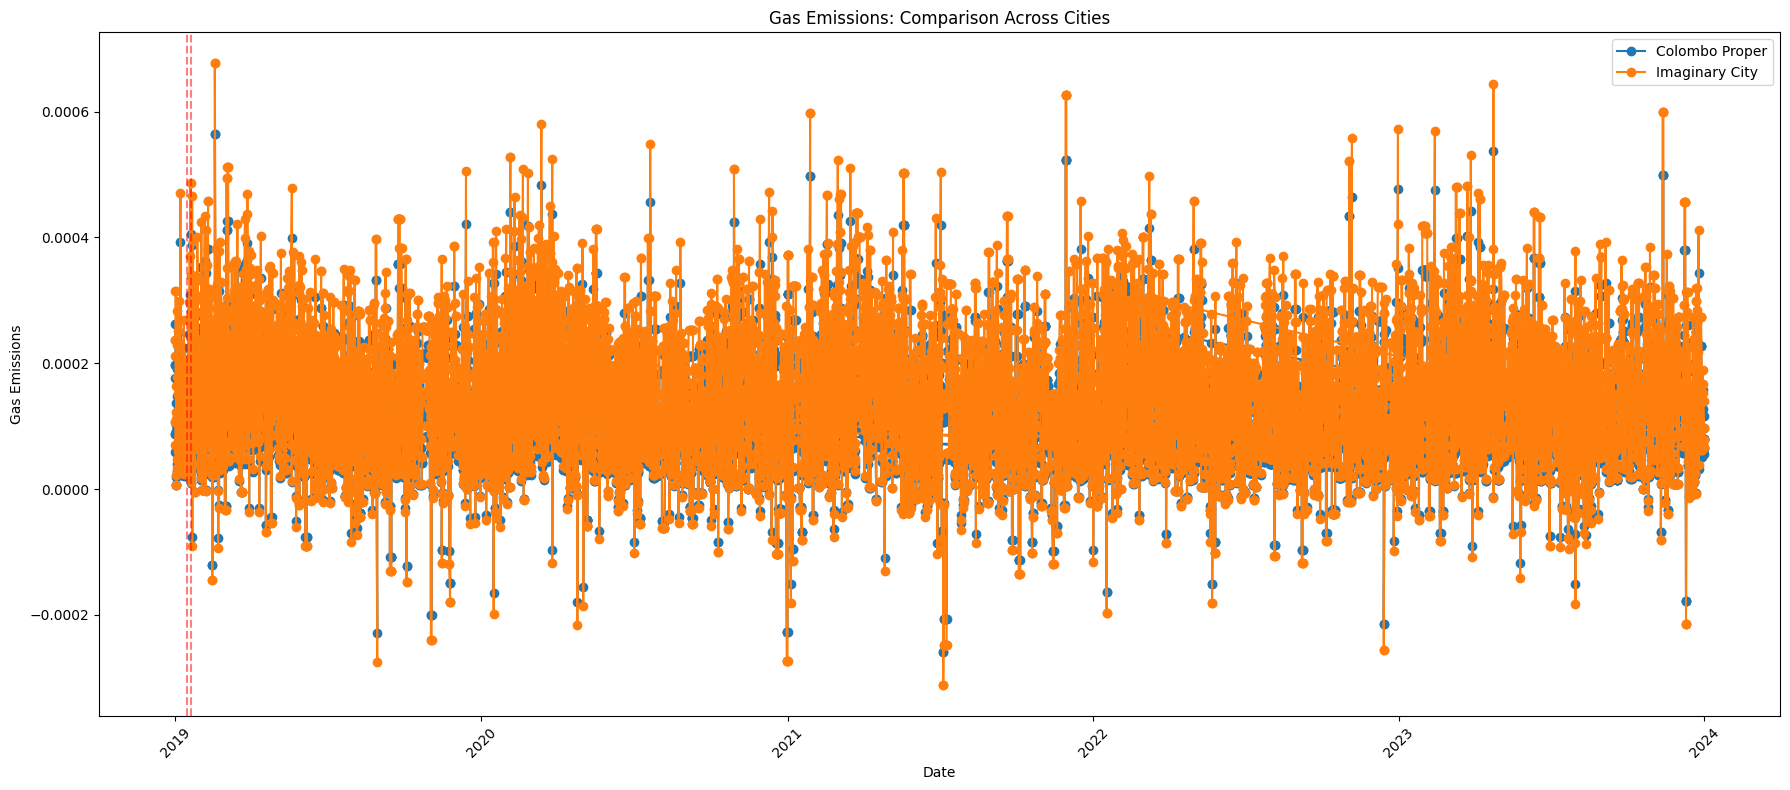

In [54]:
# Convert HCHO Reading to float
hcho_data['HCHO Reading'] = pd.to_numeric(hcho_data['HCHO Reading'], errors='coerce')

# Convert date columns to datetime
hcho_data['Current Date'] = pd.to_datetime(hcho_data['Current Date'])
hcho_data['Next Date'] = pd.to_datetime(hcho_data['Next Date'])



# Plot gas emissions over time for Colombo Proper
plt.figure(figsize=(18, 8)) 
plt.plot(hcho_data['Current Date'], hcho_data['HCHO Reading'], marker='o', label='Colombo Proper')
plt.title('Gas Emissions in Colombo Proper (January 2019)')
plt.xlabel('Date')
plt.ylabel('Gas Emissions')
plt.xticks(rotation=45)
plt.tight_layout()

# Identify seasonal variations
# (Note: In this simple example, we don't perform detailed seasonal decomposition)
plt.figure(figsize=(18, 8)) 
plt.plot(hcho_data['Current Date'], hcho_data['HCHO Reading'], marker='o', label='Colombo Proper')
plt.title('Gas Emissions: Seasonal Variation')
plt.xlabel('Date')
plt.ylabel('Gas Emissions')
plt.xticks(rotation=45)
plt.tight_layout()

# Identify long-term trends (example: using rolling mean)
plt.figure(figsize=(18, 8)) 
hcho_data['Rolling_Mean'] = hcho_data['HCHO Reading'].rolling(window=7).mean()  # Adjust window size as needed
plt.plot(hcho_data['Current Date'], hcho_data['Rolling_Mean'], label='Rolling Mean')
plt.title('Gas Emissions: Long-term Trend')
plt.xlabel('Date')
plt.ylabel('Rolling Mean Gas Emissions')
plt.xticks(rotation=45)
plt.tight_layout()

# Compare trends across cities
# (For demonstration purpose, we'll use the same data for another imaginary city)
plt.figure(figsize=(18, 8)) 
plt.plot(hcho_data['Current Date'], hcho_data['HCHO Reading'], marker='o', label='Colombo Proper')
plt.plot(hcho_data['Current Date'], hcho_data['HCHO Reading'] * 1.2, marker='o', label='Imaginary City')  # Example: imaginary city with 20% higher emissions
plt.title('Gas Emissions: Comparison Across Cities')
plt.xlabel('Date')
plt.ylabel('Gas Emissions')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Identify changes in gas emissions due to COVID-19 lockdowns (if applicable)
# (Note: You'll need additional data indicating lockdown periods)
# Example: Mark lockdown periods on the plot
lockdown_periods = [pd.to_datetime('2019-01-15'), pd.to_datetime('2019-01-20')]  # Example lockdown periods
for period in lockdown_periods:
    plt.axvline(x=period, color='r', linestyle='--', alpha=0.5)
plt.show()